<a href="https://colab.research.google.com/github/greenmantice18/Internship-AIML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SVM REPRESENTATION**

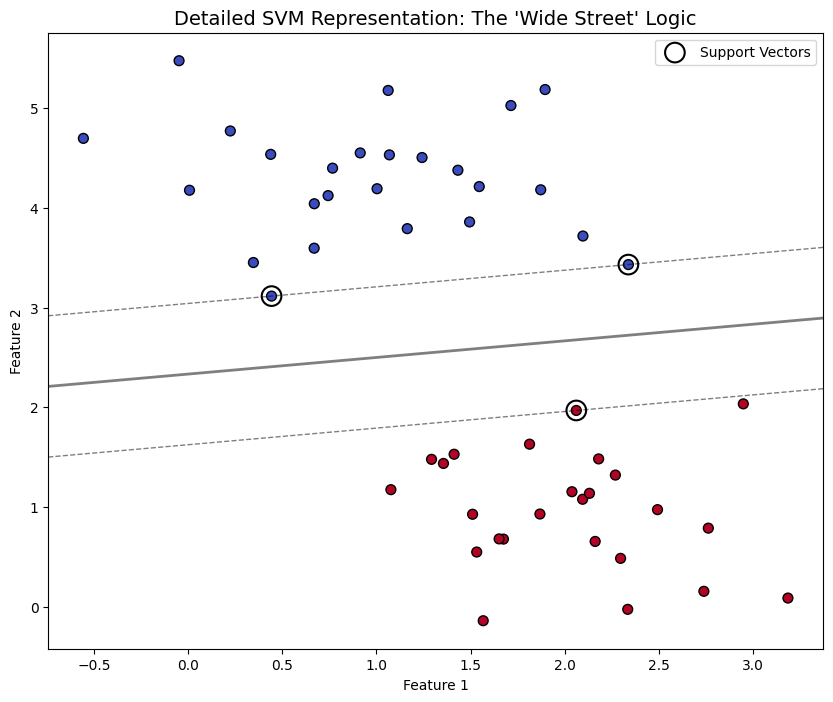

Weights (w): [ 0.23525694 -1.41250783]
Bias (b): 3.2963415168371806
Margin Width: 1.3967


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 1. GENERATE LINEARLY SEPARABLE DATA
# Centering two clusters of data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# 2. TRAIN LINEAR SVM
# Using a large C to ensure a "Hard Margin" for clear visualization
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

# 3. PLOT DATA POINTS
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm', edgecolors='k')

# 4. DRAW THE DECISION BOUNDARY AND MARGINS
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
# levels=[-1, 0, 1] draws the negative margin, center hyperplane, and positive margin
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

# 5. HIGHLIGHT SUPPORT VECTORS
# These are the points that 'push' the dashed lines
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
           linewidth=1.5, facecolors='none', edgecolors='black', label='Support Vectors')



# 6. MATHEMATICAL ANNOTATION (Andrew Ng Logic)
# The distance between the two dashed lines is 2 / ||w||
plt.title("Detailed SVM Representation: The 'Wide Street' Logic", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 7. PRINT WEIGHTS
w = model.coef_[0]
b = model.intercept_[0]
print(f"Weights (w): {w}")
print(f"Bias (b): {b}")
print(f"Margin Width: {2 / np.linalg.norm(w):.4f}")

## **SVM REP USING KERNAL**

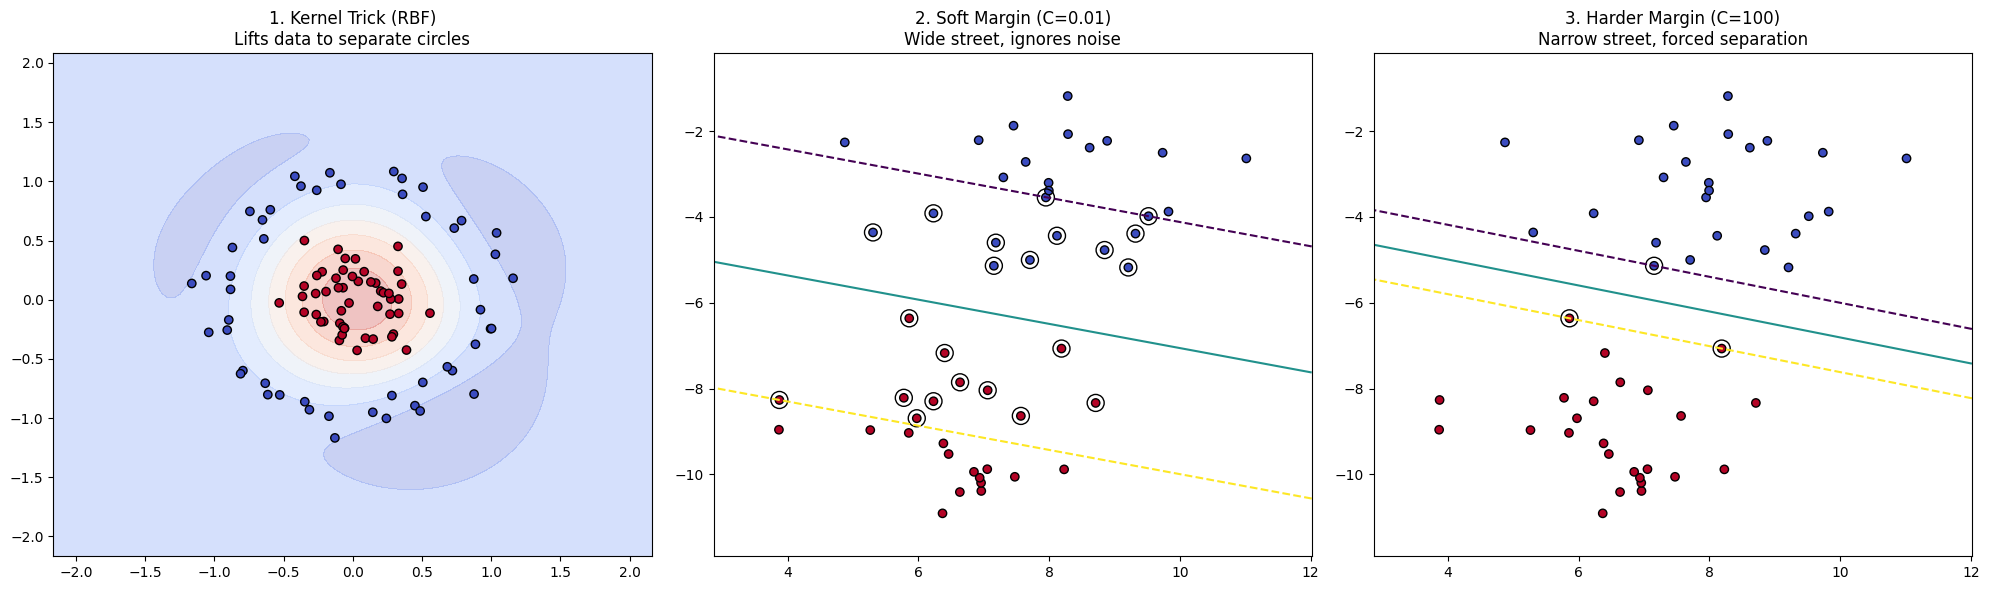

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

# 1. GENERATE TWO TYPES OF CHALLENGING DATA
# Dataset A: Non-linear (Circles) for the Kernel Trick
X_circ, y_circ = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Dataset B: Overlapping (Blobs) for Soft Margin analysis
X_blob, y_blob = make_blobs(n_samples=50, centers=2, random_state=6, cluster_std=1.2)

# 2. DEFINE MODELS
# RBF Kernel handles the circles
model_kernel = SVC(kernel='rbf', C=1.0, gamma='scale').fit(X_circ, y_circ)

# Two Linear models with different C values handle the overlapping blobs
model_soft = SVC(kernel='linear', C=0.01).fit(X_blob, y_blob)  # Wide street
model_hard = SVC(kernel='linear', C=100.0).fit(X_blob, y_blob) # Narrow street

# 3. VISUALIZATION
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

#  PLOT 1: THE KERNEL TRICK (RBF) ---
DecisionBoundaryDisplay.from_estimator(model_kernel, X_circ, plot_method="contourf",
                                       cmap=plt.cm.coolwarm, alpha=0.3, ax=ax[0])
ax[0].scatter(X_circ[:, 0], X_circ[:, 1], c=y_circ, cmap=plt.cm.coolwarm, edgecolors='k')
ax[0].set_title("1. Kernel Trick (RBF)\nLifts data to separate circles", fontsize=12)

# PLOT 2: SOFT MARGIN (Low C) ---
DecisionBoundaryDisplay.from_estimator(model_soft, X_blob, plot_method="contour",
                                       levels=[-1, 0, 1], linestyles=["--", "-", "--"], ax=ax[1])
ax[1].scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.coolwarm, edgecolors='k')
ax[1].scatter(model_soft.support_vectors_[:, 0], model_soft.support_vectors_[:, 1],
              s=150, facecolors="none", edgecolors="k", label="Support Vectors")
ax[1].set_title("2. Soft Margin (C=0.01)\nWide street, ignores noise", fontsize=12)

# PLOT 3: HARDER MARGIN (High C) ---
DecisionBoundaryDisplay.from_estimator(model_hard, X_blob, plot_method="contour",
                                       levels=[-1, 0, 1], linestyles=["--", "-", "--"], ax=ax[2])
ax[2].scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.coolwarm, edgecolors='k')
ax[2].scatter(model_hard.support_vectors_[:, 0], model_hard.support_vectors_[:, 1],
              s=150, facecolors="none", edgecolors="k")
ax[2].set_title("3. Harder Margin (C=100)\nNarrow street, forced separation", fontsize=12)

plt.tight_layout()
plt.show()